# Outliers and missing values

<a id="importing"></a>
## Importing libraries and packages

In [1]:
# Mathematical operations and data manipulation
import pandas as pd

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt

# Warnings
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

<a id="set-paths"></a>
## Set paths

In [2]:
# Path to datasets directory
data_path = "./datasets"
# Path to assets directory (for saving results to)
assets_path = "./assets"

<a id="loading-data"></a>
## Loading dataset

In [3]:
# load data
dataset = pd.read_csv(f"{data_path}/preprocessed_retail.csv")
dataset.head().T

0                   1  \
invoice                                  489434              489434   
stock_code                                85048              79323P   
desc        15CM CHRISTMAS GLASS BALL 20 LIGHTS  PINK CHERRY LIGHTS   
quantity                                     12                  12   
date                           01/12/2009 07:45    01/12/2009 07:45   
unit_price                                 6.95                6.75   
cust_id                                 13085.0             13085.0   
country                          United Kingdom      United Kingdom   

                               2                             3  \
invoice                   489434                        489434   
stock_code                79323W                         22041   
desc         WHITE CHERRY LIGHTS  RECORD FRAME 7" SINGLE SIZE    
quantity                      12                            48   
date            01/12/2009 07:45              01/12/2009 07:45   
unit_price                  6.75                           2.1   
cust_id                  13085.0                       13085.0   
country           United Kingdom                United Kingdom   

                                         4  
invoice                             489434  
stock_code                           21232  
desc        STRAWBERRY CERAMIC TRINKET BOX  
quantity                                24  
date                      01/12/2009 07:45  
unit_price                            1.25  
cust_id                            13085.0  
country                     United Kingdom

<a id="checking"></a>
## Outliers and missing values

In [4]:
dataset.isnull().sum().sort_values(ascending=False)

cust_id       107927
desc            2928
invoice            0
stock_code         0
quantity           0
date               0
unit_price         0
country            0
dtype: int64

In [5]:
dataset.describe()

quantity     unit_price        cust_id
count  525461.000000  525461.000000  417534.000000
mean       10.337667       4.688834   15360.645478
std       107.424110     146.126914    1680.811316
min     -9600.000000  -53594.360000   12346.000000
25%         1.000000       1.250000   13983.000000
50%         3.000000       2.100000   15311.000000
75%        10.000000       4.210000   16799.000000
max     19152.000000   25111.090000   18287.000000

In [6]:
# How many instances in retail have 25111.09 (max) as their unit_price value?
dataset.loc[dataset["unit_price"] == 25111.090000]

invoice stock_code    desc  quantity              date  unit_price  \
241824  C512770          M  Manual        -1  17/06/2010 16:52    25111.09   
241827   512771          M  Manual         1  17/06/2010 16:53    25111.09   

        cust_id         country  
241824  17399.0  United Kingdom  
241827      NaN  United Kingdom

In [7]:
# How many instances in retail have -53594.36 (min) as their unit_price value?
dataset.loc[dataset["unit_price"] == -53594.360000]

invoice stock_code             desc  quantity              date  \
179403  A506401          B  Adjust bad debt         1  29/04/2010 13:36   

        unit_price  cust_id         country  
179403   -53594.36      NaN  United Kingdom

Negative values for something like unit_price obviously don't make sense.

In [8]:
# The total number of instances that have negative unit_price values
(dataset["unit_price"] <= 0).sum()

3690

This is only 0.7% of the total instances.

In [9]:
# The total number of instances that have negative quantity values
(dataset["quantity"] <= 0).sum()

12326

In [10]:
# How many instances have negative values for both the unit_price and
# quantity columns, and also have missing cust_id values?
(
    (dataset["unit_price"] <= 0)
    & (dataset["quantity"] <= 0)
    & (dataset["cust_id"].isnull())
).sum()

2121

0.4% of the total instances. Delete. Around 8000 instances with missing cust_ids will remain.
Deleting those too. Storing the data with missing values in a DataFrame called null_dataset.

In [11]:
null_dataset = dataset[dataset.isnull().any(axis=1)]
null_dataset.head()

invoice stock_code                       desc  quantity              date  \
263  489464      21733               85123a mixed       -96  01/12/2009 10:52   
283  489463      71477                      short      -240  01/12/2009 10:52   
284  489467     85123A                21733 mixed      -192  01/12/2009 10:53   
470  489521      21646                        NaN       -50  01/12/2009 11:44   
577  489525     85226C  BLUE PULL BACK RACING CAR         1  01/12/2009 11:49   

     unit_price  cust_id         country  
263        0.00      NaN  United Kingdom  
283        0.00      NaN  United Kingdom  
284        0.00      NaN  United Kingdom  
470        0.00      NaN  United Kingdom  
577        0.55      NaN  United Kingdom

In [12]:
dataset.to_csv(f"{data_path}/null_retail.csv", index=False)

In [13]:
new_dataset = dataset.dropna()

In [14]:
new_dataset = new_dataset[
    (new_dataset["unit_price"] > 0) & (new_dataset["quantity"] > 0)
]
new_dataset.describe()

quantity     unit_price        cust_id
count  407664.000000  407664.000000  407664.000000
mean       13.585585       3.294438   15368.592598
std        96.840747      34.757965    1679.762138
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13997.000000
50%         5.000000       1.950000   15321.000000
75%        12.000000       3.750000   16812.000000
max     19152.000000   10953.500000   18287.000000

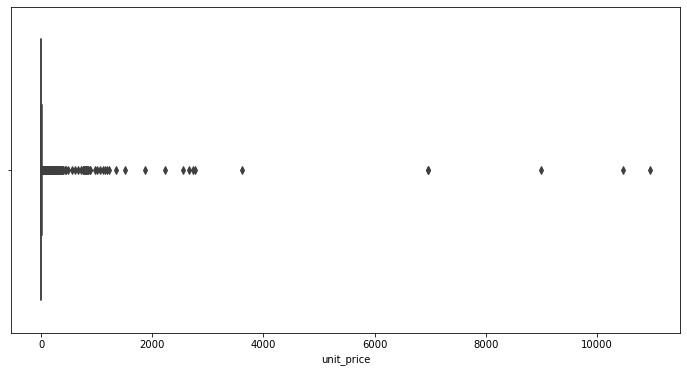

In [15]:
# Boxplot for the unit_price column
plt.subplots(figsize=(12, 6))
up = sns.boxplot(new_dataset.unit_price)

Most are between 0-4000. There are four data points beyond 6000. Keeping only those below 6000.

In [16]:
new_dataset = new_dataset[new_dataset.unit_price < 6000]
new_dataset.describe()

quantity     unit_price        cust_id
count  407659.000000  407659.000000  407659.000000
mean       13.585740       3.185750   15368.593562
std        96.841331      14.494341    1679.761725
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13997.000000
50%         5.000000       1.950000   15321.000000
75%        12.000000       3.750000   16812.000000
max     19152.000000    3610.500000   18287.000000

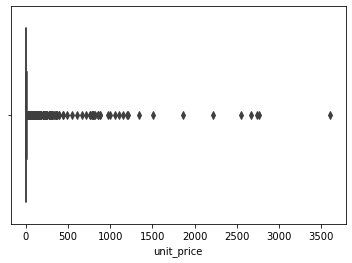

In [17]:
# Boxplot of the new unit_price column to see the changes
up_new = sns.boxplot(new_dataset.unit_price)

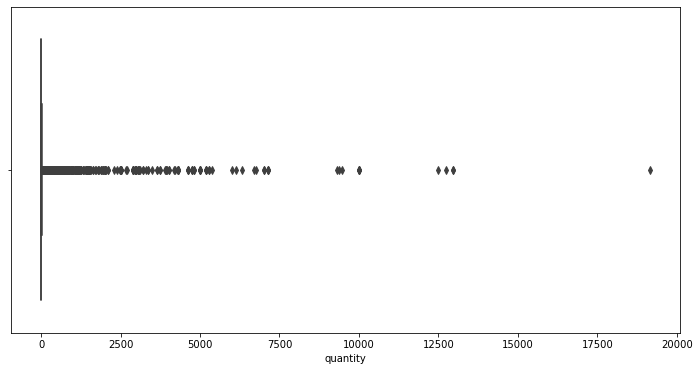

In [18]:
# Boxplot of the new quantity column to see the changes
plt.subplots(figsize=(12, 6))
q = sns.boxplot(new_dataset.quantity)

One anomaly here between 17,500 and 20,000. Also, the majority of the data points are between 1 and 7,500, with a few ranging from 7,500 to around 13,500. Deleting.

In [19]:
new_dataset = new_dataset[new_dataset.quantity < 15000]
new_dataset.describe()

quantity     unit_price        cust_id
count  407658.000000  407658.000000  407658.000000
mean       13.538792       3.185757   15368.597160
std        92.085647      14.494358    1679.762214
min         1.000000       0.001000   12346.000000
25%         2.000000       1.250000   13997.000000
50%         5.000000       1.950000   15321.000000
75%        12.000000       3.750000   16812.000000
max     12960.000000    3610.500000   18287.000000

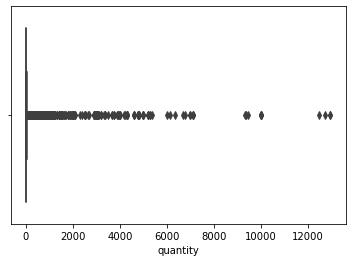

In [20]:
q_new = sns.boxplot(new_dataset.quantity)

In [21]:
dataset = new_dataset
dataset.head()

invoice stock_code                                 desc  quantity  \
0  489434      85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434     79323P                   PINK CHERRY LIGHTS        12   
2  489434     79323W                  WHITE CHERRY LIGHTS        12   
3  489434      22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434      21232       STRAWBERRY CERAMIC TRINKET BOX        24   

               date  unit_price  cust_id         country  
0  01/12/2009 07:45        6.95  13085.0  United Kingdom  
1  01/12/2009 07:45        6.75  13085.0  United Kingdom  
2  01/12/2009 07:45        6.75  13085.0  United Kingdom  
3  01/12/2009 07:45        2.10  13085.0  United Kingdom  
4  01/12/2009 07:45        1.25  13085.0  United Kingdom

In [22]:
dataset.to_csv(f"{data_path}/cleaned_retail.csv", index=False)